## Домашнее задание. Решение контеста на Kaggle

## Содержание:

## Этап №0. Загрузка необходимых библиотек и файлов.

In [81]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [82]:
#train & test datasets
train_ds = pd.read_csv('train.csv')
test_ds = pd.read_csv('test.csv')

In [83]:
#Проверка, что все файлы успешно загружены.
train_ds.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2738,29,75.55,2054.4,Male,0,Yes,Yes,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Mailed check,0
3506,5,20.35,122,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),0
2729,15,20.00,288.05,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,1
2338,58,19.15,1035.5,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
1304,3,94.60,279.55,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [84]:
test_ds.head(1)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.1,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)


## Этап №1: предобработка данных

  Для начала, рассмотрим, какие признаки представлены в нашем датасете.

In [85]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

В таблице 20 столбцов. Данные представлены типами: int, float, object (значит, предстоит обработка категориальных данных).

Описание признаков:
   *   ClientPeriod - сколько месяцев является клиентом
   *   MonthlySpending - месячная трата
   *   Total spent - трата за всё время
   *   Sex - пол
   *   IsSeniorCitizen - пожилой или нет
   *   HasPartner - имеет ли партнёра
   *   HasChild - имеет ли детей
   *   HasPhoneService - подключен ли телефон
   *   HasMultiplePhoneNumbers - подключены ли несколько номеров
   *   HasInternetService - подключен ли интернет
   *   HasOnlineSecurityService - подключена ли система безопасности
   *   HasOnlineBackup - имеет ли резервную копию
   *   HasDeviceProtection - имеет ли антивирус
   *   HasTechSupportAccess - имеет
   *   HasOnlineTV - имеет систему онлайн-тв
   *   HasMovieSubscription - имеет подписку на фильмы
   *   HasContractPhone - имеет рабочий номер (?)
   *   IsBillingPaperless - ?
   *   PaymentMethod - как оплачивает

Целевая переменная:
   *   Churn

Предварительная оценка качества данных:
   * Стиль именования колонок соблюдается.
   * Судя по всему, все категориальные данные, кроме 'IsSeniorCitizen', представлены не в численном значении.
   * Часть категориальных признаков представлена не в виде No/Yes, а в более объёмном варианте. Следует проверить на уникальные значения.
   * Null-значений в датасете нет. Нужна проверка на NaN.
   * TotalSpent-колонка представлена типом object, хотя, на первый взгляд, там float значения. Необходимо проверить все уникальные значения.

In [86]:
#Подсчёт NaN-значений
train_ds.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропущенных значений в датасете нет.

In [87]:
#получение названий колонок
col = train_ds.columns.tolist()
#получим  уникальные значения каждого признака
for i in range(0, len(col), 1):
    print(col[i] + ':')
    print('Value Count')
    print(train_ds[col[i]].value_counts())
    print()

ClientPeriod:
Value Count
ClientPeriod
1     457
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
44     34
36     34
0       9
Name: count, Length: 73, dtype: int64

MonthlySpending:
Value Count
MonthlySpending
20.05    46
19.65    35
19.95    34
20.00    33
19.70    32
         ..
87.30     1
68.90     1
67.20     1
86.30     1
98.20     1
Name: count, Length: 1468, dtype: int64

TotalSpent:
Value Count
TotalSpent
           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: count, Length: 4978, dtype: int64

Sex:
Value Count
Sex
Male      2655
Female    2627
Name: count, dtype: int64

IsSeniorCitizen:
Value Count
IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64

HasPartner:
Value Count
HasPartner
No     2705
Yes    2577
Name: count, dtype: int64

HasChild:
Value Count
HasChild
No     3676
Yes    1606
Name: count, dtype: int64

HasPhoneService:
Value Count
HasPhone

У всех представленных столбцов вцелом "хорошие" значения. Единичных "выбросов" в категориальных данных не встречается.

Проверим минимальные значения всех числовых колонок, а также выбросы.

In [88]:
#пытался узнать, сколько в столбце значений, не являющихся float64. Но метод ничего "особого не нашёл"
t = np.isreal(train_ds['TotalSpent'])


tt = pd.DataFrame(np.sort(train_ds['TotalSpent'].tolist()))
tt

,0
0,
1,
2,
3,
4,
...,...
5277,996.85
5278,996.95
5279,997.65
5280,998.1


Путём перебора методов, было найдено значение, не являющееся численным значением (' ').

Посмотрим на строки с этими значениями и запишем их индексы.

In [89]:
nanInd = train_ds[train_ds['TotalSpent'] == ' '].index
train_ds[train_ds['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Как мы видим, все такие пользователи являются новыми, поэтому итоговые траты у них пустые. Скорее всего, они обновляются в конце месяца. Но давайте перенесём значения месячных трат в итоговые траты.

In [90]:
# сначала меняем на None, т.к. иначе будет вылезать ошибка невозможности преобразовывания string в int
train_ds.loc[train_ds['TotalSpent'] == ' ', 'TotalSpent'] = None

# меняем все NaN значения
for i in range(0, len(nanInd), 1):
    train_ds.at[nanInd[i], 'TotalSpent'] = train_ds.iloc[nanInd[i]]['MonthlySpending']

# меняем тип на float
train_ds['TotalSpent'] = train_ds['TotalSpent'].astype(float)

In [91]:
# проверим
a = train_ds.iloc[[1048, 1707, 4326]].index
train_ds.iloc[a]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,25.75,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,73.35,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
4326,0,25.35,25.35,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


Далее расмотрим разных статистические характеристики числовых колонок.

In [92]:
train_ds.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.564824,0.159409,0.262022
std,24.550326,30.176464,2268.970866,0.366092,0.439776
min,0.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


С минимальными значениями всё ОК, все не меньше нуля.
Сравнивая максимальные значения с медианами (т.н. - типичными наблюдениями), вцелом, можно сказать об отсутствии выбросов. Но, для полной убедительности, посмотрим гистограмму.

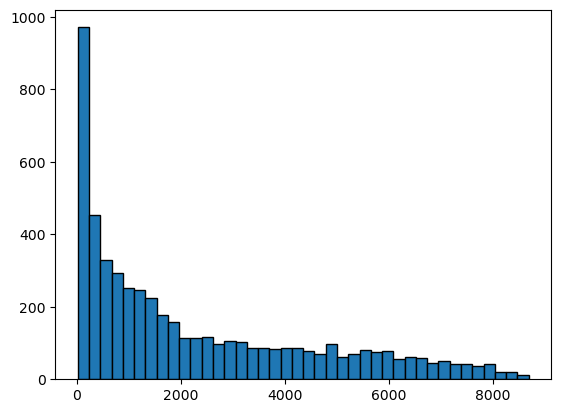

In [93]:
plt.hist(train_ds['TotalSpent'], bins=40, edgecolor = 'black');

В TotalSpent выбросов нет.

Проверим датасет на наличие дубликатов.

In [94]:
train_ds[train_ds.duplicated()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1384,1,69.90,69.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1959,1,45.70,45.70,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
2036,1,69.35,69.35,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2586,1,20.20,20.20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1
2877,1,70.10,70.10,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2991,1,20.90,20.90,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3660,1,20.45,20.45,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3749,1,20.20,20.20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


Дубликатами данные сверху, в принципе, не являются. Информация о разных клиентах. Просто они все новые, поэтому и многие значения совпадают.

# Этап №2: Анализ данных

Частично, анализ данных уже был выполнен выше.

Визуализируем то, что ранее мы получили с помощью value_counts.

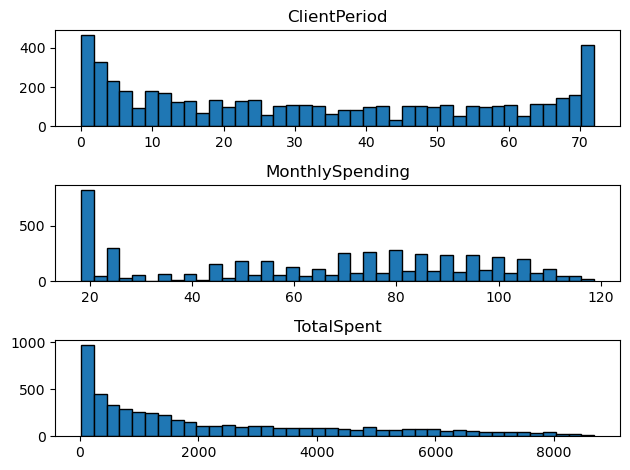

In [95]:
plt.subplot(3, 1, 1)
plt.hist(train_ds['ClientPeriod'], edgecolor = 'black', bins = 40)
plt.title('ClientPeriod')

plt.subplot(3, 1, 2)
plt.hist(train_ds['MonthlySpending'], edgecolor = 'black', bins = 40)
plt.title('MonthlySpending')

plt.subplot(3, 1, 3)
plt.hist(train_ds['TotalSpent'], edgecolor = 'black', bins = 40)
plt.title('TotalSpent')

# чтобы графики не наслаивались друг на друга
plt.tight_layout();

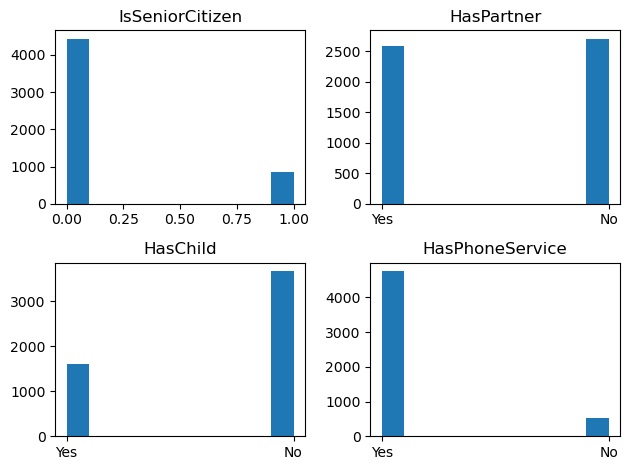

In [96]:
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

for i in range(1, 5, 1):
    plt.subplot(2, 2, i)
    plt.title(cat_cols[i])
    plt.hist(train_ds[cat_cols[i]])
    
plt.tight_layout()

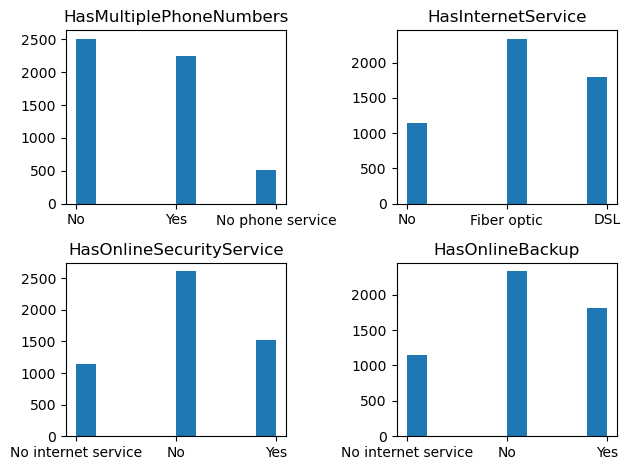

In [97]:
for i in range(5, 9, 1):
    plt.subplot(2, 2, i-4)
    plt.title(cat_cols[i])
    plt.hist(train_ds[cat_cols[i]])
    
plt.tight_layout()

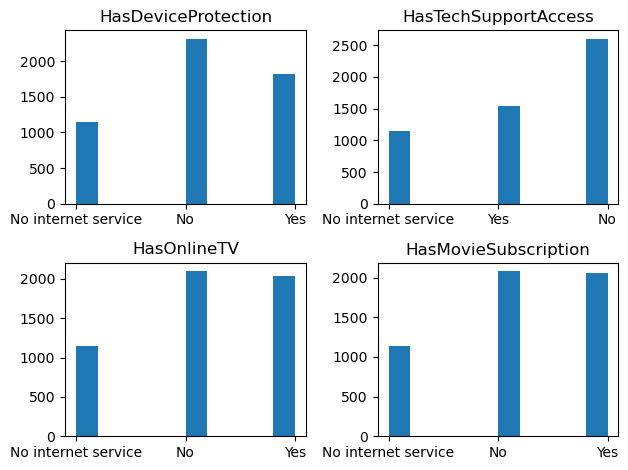

In [98]:
for i in range(9, 13, 1):
    plt.subplot(2, 2, i-8)
    plt.title(cat_cols[i])
    plt.hist(train_ds[cat_cols[i]])
    
plt.tight_layout()

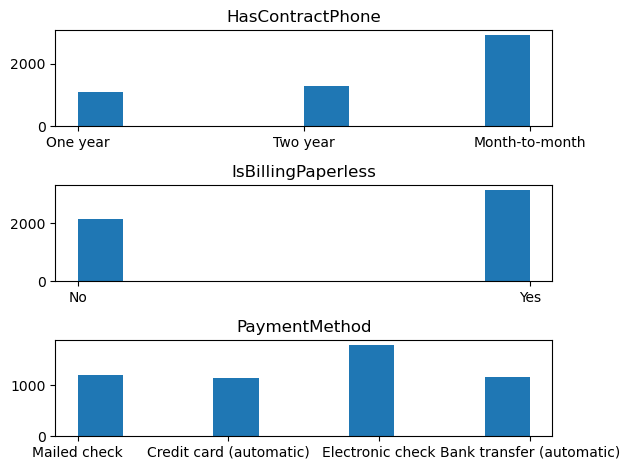

In [99]:
for i in range(13, 16, 1):
    plt.subplot(3, 1, i-12)
    plt.title(cat_cols[i])
    plt.hist(train_ds[cat_cols[i]])
    
plt.tight_layout()

Далее посмотрим, являются ли классы, по целевой переменной, сбалансированными.

<Axes: ylabel='Churn'>

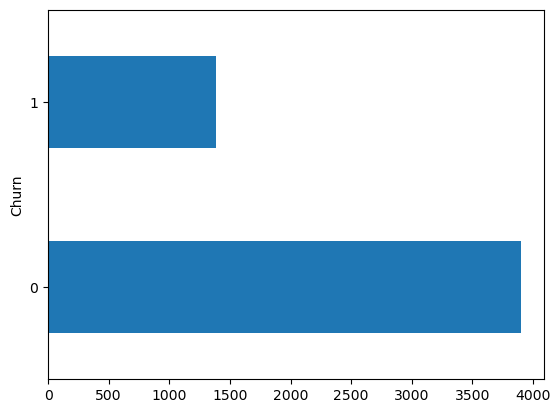

In [100]:
train_ds['Churn'].value_counts().plot.barh()

In [101]:
train_ds['Churn'].value_counts()

Churn
0    3898
1    1384
Name: count, dtype: int64

Классы и правда являются несбалансированными. Соотношение 1 к 3. Но придётся, на данный момент, работать с тем, что есть.

# Этап №2: применение линейных моделей

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Стандартизируем наши столбцы

In [103]:
num_cols = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']
# воспользуемся one-hot-encoding
numeric_data = train_ds[num_cols]

scaler = StandardScaler().fit(numeric_data)
#scaler = MinMaxScaler().fit(numeric_data)
numeric_data_scaled = pd.DataFrame(scaler.transform(numeric_data))
numeric_data_scaled

,0,1,2
0,0.920767,-1.505447,-0.555906
1,1.613288,-1.294998,-0.183080
2,-1.279005,0.363737,-0.974836
3,-0.016173,0.476418,0.124489
4,1.124450,1.667856,1.970633
...,...,...,...
5277,-1.197532,-1.144204,-0.972081
5278,0.717084,-0.678565,-0.043687
5279,-1.279005,-0.327265,-0.984026
5280,-0.138382,0.367051,-0.031874


Выполним one-hot encoding.

In [104]:
# отделим признаки от значений классов
y_train = train_ds['Churn']

# воспользуемся one-hot-encoding
categorial_data = train_ds[cat_cols]
dummy_features = pd.get_dummies(categorial_data)

# конкатенация получившихся столбцов
x_train_scaled = pd.concat([numeric_data_scaled, dummy_features], axis=1)
x_train_scaled

,0,1,2,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555906,0,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
1,1.613288,-1.294998,-0.183080,0,False,True,False,True,True,False,...,False,False,False,True,True,False,False,True,False,False
2,-1.279005,0.363737,-0.974836,0,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
3,-0.016173,0.476418,0.124489,1,True,False,False,True,True,False,...,False,True,False,False,True,False,False,False,False,True
4,1.124450,1.667856,1.970633,0,True,False,False,True,False,True,...,True,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.972081,0,False,True,True,False,True,False,...,False,True,False,False,True,False,False,False,True,False
5278,0.717084,-0.678565,-0.043687,0,False,True,False,True,True,False,...,False,False,True,False,False,True,True,False,False,False
5279,-1.279005,-0.327265,-0.984026,0,False,True,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
5280,-0.138382,0.367051,-0.031874,0,True,False,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False


In [105]:
x_train_scaled = x_train_scaled.astype(float)
y_train = y_train.astype(float)

x_train_scaled.columns = x_train_scaled.columns.astype(str)

# лог.регрессия
lr_model = LogisticRegression()
# параметры
param_grid = {'C': [500, 400, 300, 200, 100, 10, 1, 0.1, 0.01, 0.001],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(x_train_scaled, y_train)

# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_score'])

Best Hyperparameters: {'C': 500, 'solver': 'sag'}
Best Cross-Validation Score: 0.8451287619528334


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.185194,0.003370,0.004010,6.070270e-06,500,sag,"{'C': 500, 'solver': 'sag'}",0.862274,0.836976,0.834574,0.856110,0.835710,0.845129,0.011672,1
9,0.205630,0.001799,0.003802,4.021676e-04,400,saga,"{'C': 400, 'solver': 'saga'}",0.862270,0.836916,0.834597,0.856092,0.835756,0.845126,0.011664,2
10,0.080997,0.004611,0.003829,3.146459e-04,300,newton-cg,"{'C': 300, 'solver': 'newton-cg'}",0.862251,0.836976,0.834592,0.856092,0.835719,0.845126,0.011657,3
24,0.205797,0.000401,0.003401,4.906225e-04,100,saga,"{'C': 100, 'solver': 'saga'}",0.862265,0.836934,0.834583,0.856068,0.835770,0.845124,0.011656,4
17,0.026598,0.003980,0.004002,1.266988e-06,200,liblinear,"{'C': 200, 'solver': 'liblinear'}",0.862270,0.836985,0.834588,0.856096,0.835682,0.845124,0.011669,5
1,0.030402,0.001854,0.003798,4.010680e-04,500,lbfgs,"{'C': 500, 'solver': 'lbfgs'}",0.862251,0.836962,0.834583,0.856110,0.835710,0.845123,0.011665,6
6,0.029800,0.001166,0.004001,6.468134e-07,400,lbfgs,"{'C': 400, 'solver': 'lbfgs'}",0.862256,0.836957,0.834578,0.856101,0.835724,0.845123,0.011664,7
8,0.176858,0.000351,0.003798,4.069332e-04,400,sag,"{'C': 400, 'solver': 'sag'}",0.862274,0.836957,0.834560,0.856115,0.835710,0.845123,0.011678,8
11,0.030202,0.001470,0.003797,4.010207e-04,300,lbfgs,"{'C': 300, 'solver': 'lbfgs'}",0.862274,0.836957,0.834583,0.856078,0.835715,0.845121,0.011666,9
15,0.079199,0.006790,0.003796,3.989046e-04,200,newton-cg,"{'C': 200, 'solver': 'newton-cg'}",0.862270,0.836985,0.834578,0.856087,0.835687,0.845121,0.011668,10


Лучший score = 0.8451259 достингут при параметрах {'C': 300, 'solver': 'newton-cg'}

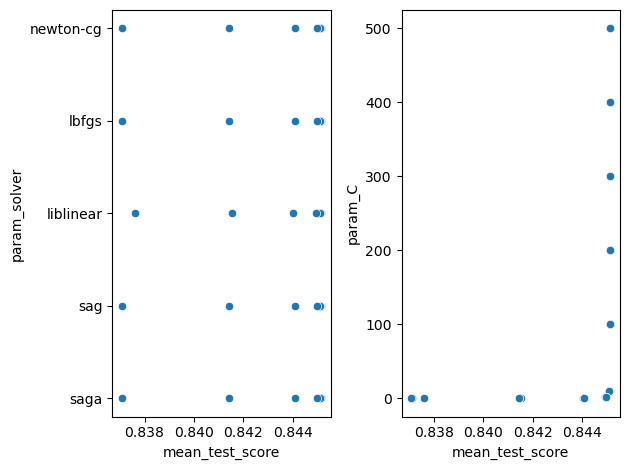

In [106]:
plt.subplot(1, 2, 1)
sns.scatterplot(data=pd.DataFrame(grid_search.cv_results_), x = 'mean_test_score', y='param_solver')
plt.subplot(1, 2, 2)
sns.scatterplot(data=pd.DataFrame(grid_search.cv_results_), x = 'mean_test_score', y='param_C')

plt.tight_layout()

В целом, как можно увидеть, при любом solver и C достигаются максимальные значения (с точностью до 3-х знаков). Поэтому тут и правда требовался перебор по сетке, ведь лучшие значение достигаются лишь при выборе нескольких признаков.

In [107]:
#сохраним логистическую регрессию с лучшими параметрами
lr_model2 = LogisticRegression(C = 300, solver = 'newton-cg')
lr_model2.fit(x_train_scaled, y_train)

LogisticRegression(C=300, solver='newton-cg')

Ради интереса, обучим также два классификатора: метод ближайших соседей и дерево, а затем с помощью стекинга попробуем вновь решить задачу.

In [108]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [109]:
NearestNeighborsModel = KNeighborsClassifier()

params_kn_grid = {'n_neighbors': range(1,10,1), 
           'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhatten', 'minkowski', 'ward']}

NNGrid = GridSearchCV(NearestNeighborsModel, params_kn_grid, cv=5, scoring='accuracy')
NNGrid.fit(x_train_scaled, y_train)
# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", NNGrid.best_params_)
print("Best Cross-Validation Score:", NNGrid.best_score_)

pd.DataFrame(NNGrid.cv_results_).sort_values(by=['rank_test_score'])

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Score: 0.766562562713225


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
53,0.005400,0.000489,0.040398,0.003384,minkowski,9,distance,"{'metric': 'minkowski', 'n_neighbors': 9, 'wei...",0.779565,0.770104,0.765152,0.769886,0.748106,0.766563,0.010347,1
17,0.005800,0.000400,0.036401,0.000490,euclidean,9,distance,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.779565,0.770104,0.765152,0.769886,0.748106,0.766563,0.010347,1
15,0.006200,0.000748,0.039400,0.003010,euclidean,8,distance,"{'metric': 'euclidean', 'n_neighbors': 8, 'wei...",0.778619,0.762535,0.753788,0.775568,0.748106,0.763723,0.011884,3
51,0.005400,0.000490,0.038602,0.002577,minkowski,8,distance,"{'metric': 'minkowski', 'n_neighbors': 8, 'wei...",0.778619,0.762535,0.753788,0.775568,0.748106,0.763723,0.011884,3
49,0.005999,0.000633,0.037999,0.002529,minkowski,7,distance,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.768212,0.764428,0.761364,0.764205,0.757576,0.763157,0.003539,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.001599,0.000489,0.000000,0.000000,manhatten,9,uniform,"{'metric': 'manhatten', 'n_neighbors': 9, 'wei...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
70,0.001400,0.000489,0.000000,0.000000,ward,9,uniform,"{'metric': 'ward', 'n_neighbors': 9, 'weights'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
36,0.005200,0.000400,0.000800,0.000400,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
40,0.005800,0.000400,0.001200,0.000400,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19


In [110]:
best_knn_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9, weights = 'distance')

In [111]:
des_tree_model = DecisionTreeClassifier()
params_tree_grid = {'max_depth': range(1,10,1),
                    'criterion': ['gini', 'entropy', 'log_loss']}

grid_dt = GridSearchCV(des_tree_model, params_tree_grid, cv = 5, scoring='roc_auc')

grid_dt.fit(x_train_scaled, y_train)
# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", grid_dt.best_params_)
print("Best Cross-Validation Score:", grid_dt.best_score_)

pd.DataFrame(grid_dt.cv_results_).sort_values(by=['rank_test_score'])

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5}
Best Cross-Validation Score: 0.8272230244586094


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.023399,7.991166e-04,0.004802,3.979635e-04,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.831570,0.815785,0.826335,0.836857,0.825568,0.827223,0.007015,1
22,0.022431,4.663101e-04,0.004006,5.950729e-06,log_loss,5,"{'criterion': 'log_loss', 'max_depth': 5}",0.831570,0.815785,0.826335,0.836857,0.825568,0.827223,0.007015,1
3,0.017795,4.001284e-04,0.004205,4.057664e-04,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.838327,0.817479,0.831705,0.834463,0.813030,0.827001,0.009919,3
4,0.020998,1.598649e-06,0.004001,2.866581e-06,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.831431,0.815623,0.825153,0.834334,0.826017,0.826512,0.006419,4
12,0.020056,1.203799e-04,0.004601,4.904278e-04,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.835678,0.818613,0.829877,0.832373,0.807800,0.824868,0.010283,5
21,0.018797,4.025468e-04,0.004003,1.834429e-06,log_loss,4,"{'criterion': 'log_loss', 'max_depth': 4}",0.835678,0.818613,0.829877,0.832373,0.807800,0.824868,0.010283,5
14,0.026601,4.893963e-04,0.004001,2.834676e-06,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.832428,0.798753,0.814888,0.828872,0.811174,0.817223,0.012248,7
23,0.025995,4.105787e-06,0.004004,5.864516e-06,log_loss,6,"{'criterion': 'log_loss', 'max_depth': 6}",0.830332,0.798058,0.812149,0.828872,0.811174,0.816117,0.012092,8
5,0.024394,4.909498e-04,0.004205,4.039640e-04,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.832357,0.802363,0.807702,0.823144,0.811686,0.815450,0.010868,9
2,0.014195,3.998287e-04,0.004005,3.686170e-06,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.822572,0.806616,0.806747,0.808762,0.795285,0.807996,0.008696,10


In [112]:
best_destree_model = DecisionTreeClassifier(criterion='log_loss', max_depth=5)

In [113]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

nanInd2 = X_test[X_test['TotalSpent'] == ' '].index
# сначала меняем на None, т.к. иначе будет вылезать ошибка невозможности преобразовывания string в int
X_test.loc[X_test['TotalSpent'] == ' ', 'TotalSpent'] = None

# меняем все NaN значения
for i in range(0, len(nanInd2), 1):
    X_test.at[nanInd2[i], 'TotalSpent'] = X_test.iloc[nanInd2[i]]['MonthlySpending']

# меняем тип на float
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

num_cols = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']
# воспользуемся one-hot-encoding
numeric_data2 = X_test[num_cols]

scaler = StandardScaler().fit(numeric_data2)
numeric_data_scaled2 = pd.DataFrame(scaler.transform(numeric_data2))

# воспользуемся one-hot-encoding
categorial_data2 = X_test[cat_cols]
dummy_features2 = pd.get_dummies(categorial_data2)

# конкатенация получившихся столбцов
x_test_scaled2 = pd.concat([numeric_data_scaled2, dummy_features2], axis=1)
x_test_scaled2 = x_test_scaled2.astype(float)

In [114]:
estimators = [('lr', LogisticRegression(C = 300, solver = 'newton-cg')), 
              ('knn', KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9, weights = 'distance')), 
              ('dt', DecisionTreeClassifier(criterion='log_loss', max_depth=5))]
modelClf = StackingClassifier(estimators=estimators)

params = {'dt__max_depth': range(1,10,1)}

stacking_grid = GridSearchCV(modelClf, params, cv = 5, scoring='roc_auc')

stacking_grid.fit(x_train_scaled, y_train)
# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", stacking_grid.best_params_)
print("Best Cross-Validation Score:", stacking_grid.best_score_)

pd.DataFrame(stacking_grid.cv_results_).sort_values(by=['rank_test_score'])

Best Hyperparameters: {'dt__max_depth': 5}
Best Cross-Validation Score: 0.8467107607295162


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.745419,0.017667,0.045198,0.004444,5,{'dt__max_depth': 5},0.859919,0.838054,0.839521,0.858094,0.837967,0.846711,0.010071,1
3,0.737401,0.017626,0.045398,0.004223,4,{'dt__max_depth': 4},0.861488,0.837980,0.840347,0.858580,0.834236,0.846526,0.011237,2
5,0.769117,0.021624,0.043597,0.003199,6,{'dt__max_depth': 6},0.861386,0.834240,0.837723,0.858075,0.835724,0.845430,0.011775,3
2,0.710614,0.015649,0.043002,0.001999,3,{'dt__max_depth': 3},0.860275,0.839327,0.836738,0.855818,0.834626,0.845357,0.010562,4
6,0.784622,0.020894,0.042399,0.001022,7,{'dt__max_depth': 7},0.861793,0.835194,0.837616,0.856272,0.835701,0.845315,0.011364,5
7,0.805032,0.021251,0.042398,0.001355,8,{'dt__max_depth': 8},0.861654,0.835453,0.836729,0.855364,0.835302,0.844900,0.011299,6
8,0.827801,0.022326,0.042200,0.000977,9,{'dt__max_depth': 9},0.861085,0.836897,0.835730,0.854090,0.834755,0.844511,0.010924,7
0,0.709491,0.048082,0.047997,0.004561,1,{'dt__max_depth': 1},0.857202,0.837184,0.836329,0.856328,0.832383,0.843885,0.010644,8
1,0.694400,0.017096,0.043416,0.001377,2,{'dt__max_depth': 2},0.859062,0.835157,0.834495,0.856226,0.834167,0.843821,0.011326,9


По итогу, при применении стэкинга, был выдан лучший score, чем у каждого алгоритма был по отдельности. Но, само качество повысилось, относительно лидера - логистической регрессии, на 0.001, что не назвать большим выигрышом в качестве.

# Применение градиентного бустинга

In [115]:
!pip install catboost

In [116]:
!pip install ipywidgets

In [117]:
import catboost
!jupyter nbextension enable --py widgetsnbextension
!pip install graphviz

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [118]:
# сохраним всё, кроме y
train_values = train_ds[train_ds.columns[0:len(train_ds.columns) - 1]];

In [119]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_cols, eval_metric='AUC', silent=True)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

# поиск по сетке и кросс-валидация, основанная на встроенном методе catboost
grid_search_results = boosting_model.grid_search(grid,
                                       X=train_values,
                                       y=y_train,
                                       plot=True,
                                       cv = 5,
                                       refit = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8731896519
bestIteration = 108

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8731897	best: 0.8731897 (0)	total: 4.3s	remaining: 2m 47s

bestTest = 0.8708801444
bestIteration = 43

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8708801	best: 0.8731897 (0)	total: 8.76s	remaining: 2m 46s

bestTest = 0.873027246
bestIteration = 162

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8730272	best: 0.8731897 (0)	total: 13s	remaining: 2m 40s

bestTest = 0.872745424
bestIteration = 32

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8727454	best: 0.8731897 (0)	total: 17.4s	remaining: 2m 36s

bestTe


bestTest = 0.8626189384
bestIteration = 16

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8626189	best: 0.8737485 (7)	total: 3m 59s	remaining: 42.3s

bestTest = 0.8671185372
bestIteration = 33

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8671185	best: 0.8737485 (7)	total: 4m 10s	remaining: 35.7s

bestTest = 0.8635408308
bestIteration = 15

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8635408	best: 0.8737485 (7)	total: 4m 23s	remaining: 29.3s

bestTest = 0.8696000038
bestIteration = 57

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8696000	best: 0.8737485 (7)	total: 4m 34s	remaining: 22.3s


По итогам поиска по сетке, с помощью CatBoost, лучший score = 0.87374 был достигнут при значениях depth = 4, learning_rate = 0.1, l2_reg = 7.
По итогам, boosting_model показал лучшие результаты.

# Предсказание на test

Лучшей моделью оказался бустинг.

In [120]:
submission['Churn'] = boosting_model.predict_proba(X_test)[:, 1]
submission = submission['Churn']
submission.to_csv('./my_submission3.csv')